# Medical Price Prediction Model

##Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Collection and Preprocessing

In [ ]:
# import csv data to a pandas datafranme
insurance_data = pd.read_csv('/content/insurance.csv')

In [ ]:
# checking data
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_data.shape

(1338, 7)

In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
insurance_data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


### Encoding the categorical features

In [ ]:
insurance_data.replace({'sex':{'male':0, 'female':1}}, inplace = True)

<ipython-input-16-0166c7c3894a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'sex':{'male':0, 'female':1}}, inplace = True)


In [ ]:
insurance_data.replace({'smoker':{'yes':1, 'no':0}}, inplace = True)

<ipython-input-13-65f8120d3562>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'smoker':{'yes':1, 'no':0}}, inplace = True)


In [ ]:
insurance_data.replace({'region':{'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}}, inplace = True)

<ipython-input-14-ae5d1920b8ee>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'region':{'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}}, inplace = True)


In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


##Splitting features and target

In [ ]:
X = insurance_data.drop('charges', axis = 1)
Y = insurance_data['charges']

In [ ]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2


In [ ]:
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


## Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


## Model training and Evaluation

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
training_data_predictions = regressor.predict(X_train)

In [ ]:
print(training_data_predictions)

[  852.63979349  9173.4786418  12809.13017864 ... 16934.63879935
  9224.06278234 14135.88486686]


In [ ]:
# r2 score
r2_train = metrics.r2_score(Y_train, training_data_predictions)
print(r2_train)

0.7519923667088932


In [ ]:
test_data_predictions = regressor.predict(X_test)


In [ ]:
r2_test = metrics.r2_score(Y_test, test_data_predictions)
print(r2_test)

0.7445422986536503


## Building a predictive system

In [ ]:
input_data = (45,1,38.285,0,0,3)
np_array = np.asarray(input_data)
data_reshaped = np_array.reshape(1,-1)
prediction = regressor.predict(data_reshaped)
print(prediction)

[12227.24085841]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


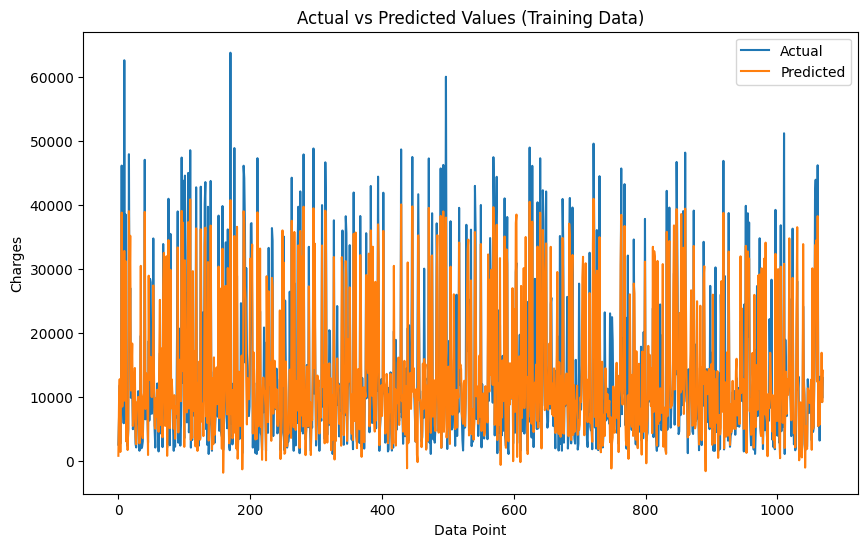

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Y_train.values, label='Actual')
plt.plot(training_data_predictions, label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Charges')
plt.title('Actual vs Predicted Values (Training Data)')
plt.legend()
plt.show()